In [6]:
r = [1.3, 2, 2.5]
infected = [1, 1, 1]

In [18]:
rows = []
for _ in range(20):
    rows.append(tuple(infected))
    for i in range(len(infected)):
        infected[i] *= r[i]
rows

[(1, 1, 1),
 (1.3, 2, 2.5),
 (1.6900000000000002, 4, 6.25),
 (2.1970000000000005, 8, 15.625),
 (2.856100000000001, 16, 39.0625),
 (3.7129300000000014, 32, 97.65625),
 (4.826809000000002, 64, 244.140625),
 (6.274851700000003, 128, 610.3515625),
 (8.157307210000004, 256, 1525.87890625),
 (10.604499373000007, 512, 3814.697265625),
 (13.785849184900009, 1024, 9536.7431640625),
 (17.921603940370012, 2048, 23841.85791015625),
 (23.298085122481016, 4096, 59604.644775390625),
 (30.287510659225322, 8192, 149011.61193847656),
 (39.37376385699292, 16384, 372529.0298461914),
 (51.1858930140908, 32768, 931322.5746154785),
 (66.54166091831804, 65536, 2328306.4365386963),
 (86.50415919381346, 131072, 5820766.091346741),
 (112.45540695195751, 262144, 14551915.228366852),
 (146.19202903754478, 524288, 36379788.07091713)]

In [15]:
# Convert to integer and format with commas
display_rows = [[f"{int(col):,}" for col in row] for row in rows]

In [17]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(display_rows, tablefmt='html')))

1,1,1
1,2,2
1,4,6
2,8,15
2,16,39
3,32,97
4,64,244
6,128,610
8,256,"1,525"
10,512,"3,814"
13,"1,024","9,536"


In [21]:
import matplotlib.pyplot as plt
import numpy as np

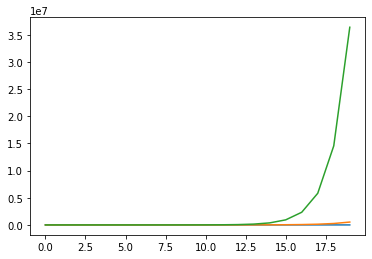

In [22]:
plt.plot(rows)
plt.show()